# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [70]:
#Import all the necessary modules
#Import all libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [5]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
import pandas as pd
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima = pd.read_csv("pima-indians-diabetes.data", names= colnames)
pima.head()

preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [6]:
pima.sample(10)

preg  plas  pres  skin  test  mass   pedi  age  class
735     4    95    60    32     0  35.4  0.284   28      0
632     2   111    60     0     0  26.2  0.343   23      0
162     0   114    80    34   285  44.2  0.167   27      0
503     7    94    64    25    79  33.3  0.738   41      0
258     1   193    50    16   375  25.9  0.655   24      0
465     0   124    56    13   105  21.8  0.452   21      0
515     3   163    70    18   105  31.6  0.268   28      1
720     4    83    86    19     0  29.3  0.317   34      0
674     8    91    82     0     0  35.6  0.587   68      0
32      3    88    58    11    54  24.8  0.267   22      0

# Q3 Print the datatypes of each column and the shape of the dataset 

In [7]:
pima.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [8]:
pima.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [10]:
pima.isnull().any()

preg     False
plas     False
pres     False
skin     False
test     False
mass     False
pedi     False
age      False
class    False
dtype: bool

In [11]:
#check for 0 value 
pima.all()

preg     False
plas     False
pres     False
skin     False
test     False
mass     False
pedi      True
age       True
class    False
dtype: bool

In [34]:
#we can have 0 values in preg 
pima['pedi']=pima['pedi'].replace(0,pima['pedi'].median())
pima['age']=pima['age'].replace(0,pima['age'].median())
pima['plas']=pima['plas'].replace(0,pima['plas'].median())
pima['skin']=pima['skin'].replace(0,pima['skin'].median())
pima['mass']=pima['mass'].replace(0,pima['mass'].median())
pima['test']=pima['test'].replace(0,pima['test'].median())
pima['pres']=pima['pres'].replace(0,pima['pres'].median())


# Q5 Print the descriptive statistics of each & every column using describe() function

In [22]:
pima.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [49]:
print(pima['preg'].describe())
print(pima.groupby('class')['preg'].describe())

#from this we can have an insight generally the women with higher pregnancy are more inclined to get diabeties

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: preg, dtype: float64
       count      mean       std  min   25%  50%  75%   max
class                                                      
0      500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0
1      268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0


In [48]:
print("Glucose level ")
print(pima['plas'].describe())
pima.groupby('class')['plas'].describe()
#from this we infer -- we can clearly infer from inimum values --- that people with high glucose level have high chance of diabities

Glucose level 
count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: plas, dtype: float64


count        mean        std   min    25%    50%    75%    max
class                                                                
0      500.0  110.682000  24.707201  44.0   93.0  107.5  125.0  197.0
1      268.0  142.130597  29.568839  78.0  119.0  140.0  167.0  199.0

In [50]:
print(pima['pres'].describe())


count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: pres, dtype: float64


In [51]:
print(pima['skin'].describe())


count    768.000000
mean      27.334635
std        9.229014
min        7.000000
25%       23.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: skin, dtype: float64


In [52]:
print(pima['test'].describe())


count    768.000000
mean      94.652344
std      105.547598
min       14.000000
25%       30.500000
50%       31.250000
75%      127.250000
max      846.000000
Name: test, dtype: float64


In [53]:
print(pima['mass'].describe())


count    768.000000
mean      32.450911
std        6.875366
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: mass, dtype: float64


In [54]:
print(pima['pedi'].describe())


count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: pedi, dtype: float64


In [55]:
print(pima['age'].describe())


count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64


In [57]:
print(pima['class'].describe())

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: class, dtype: float64


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

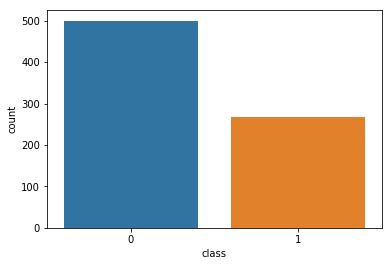

In [69]:
 sns.countplot(x="class", data=pima)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

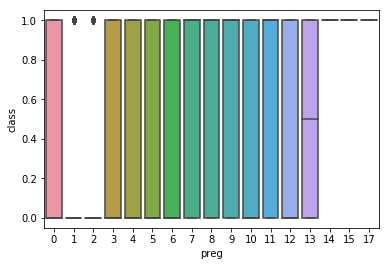

In [64]:
sns.boxplot(x="preg",y="class",data = pima )

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


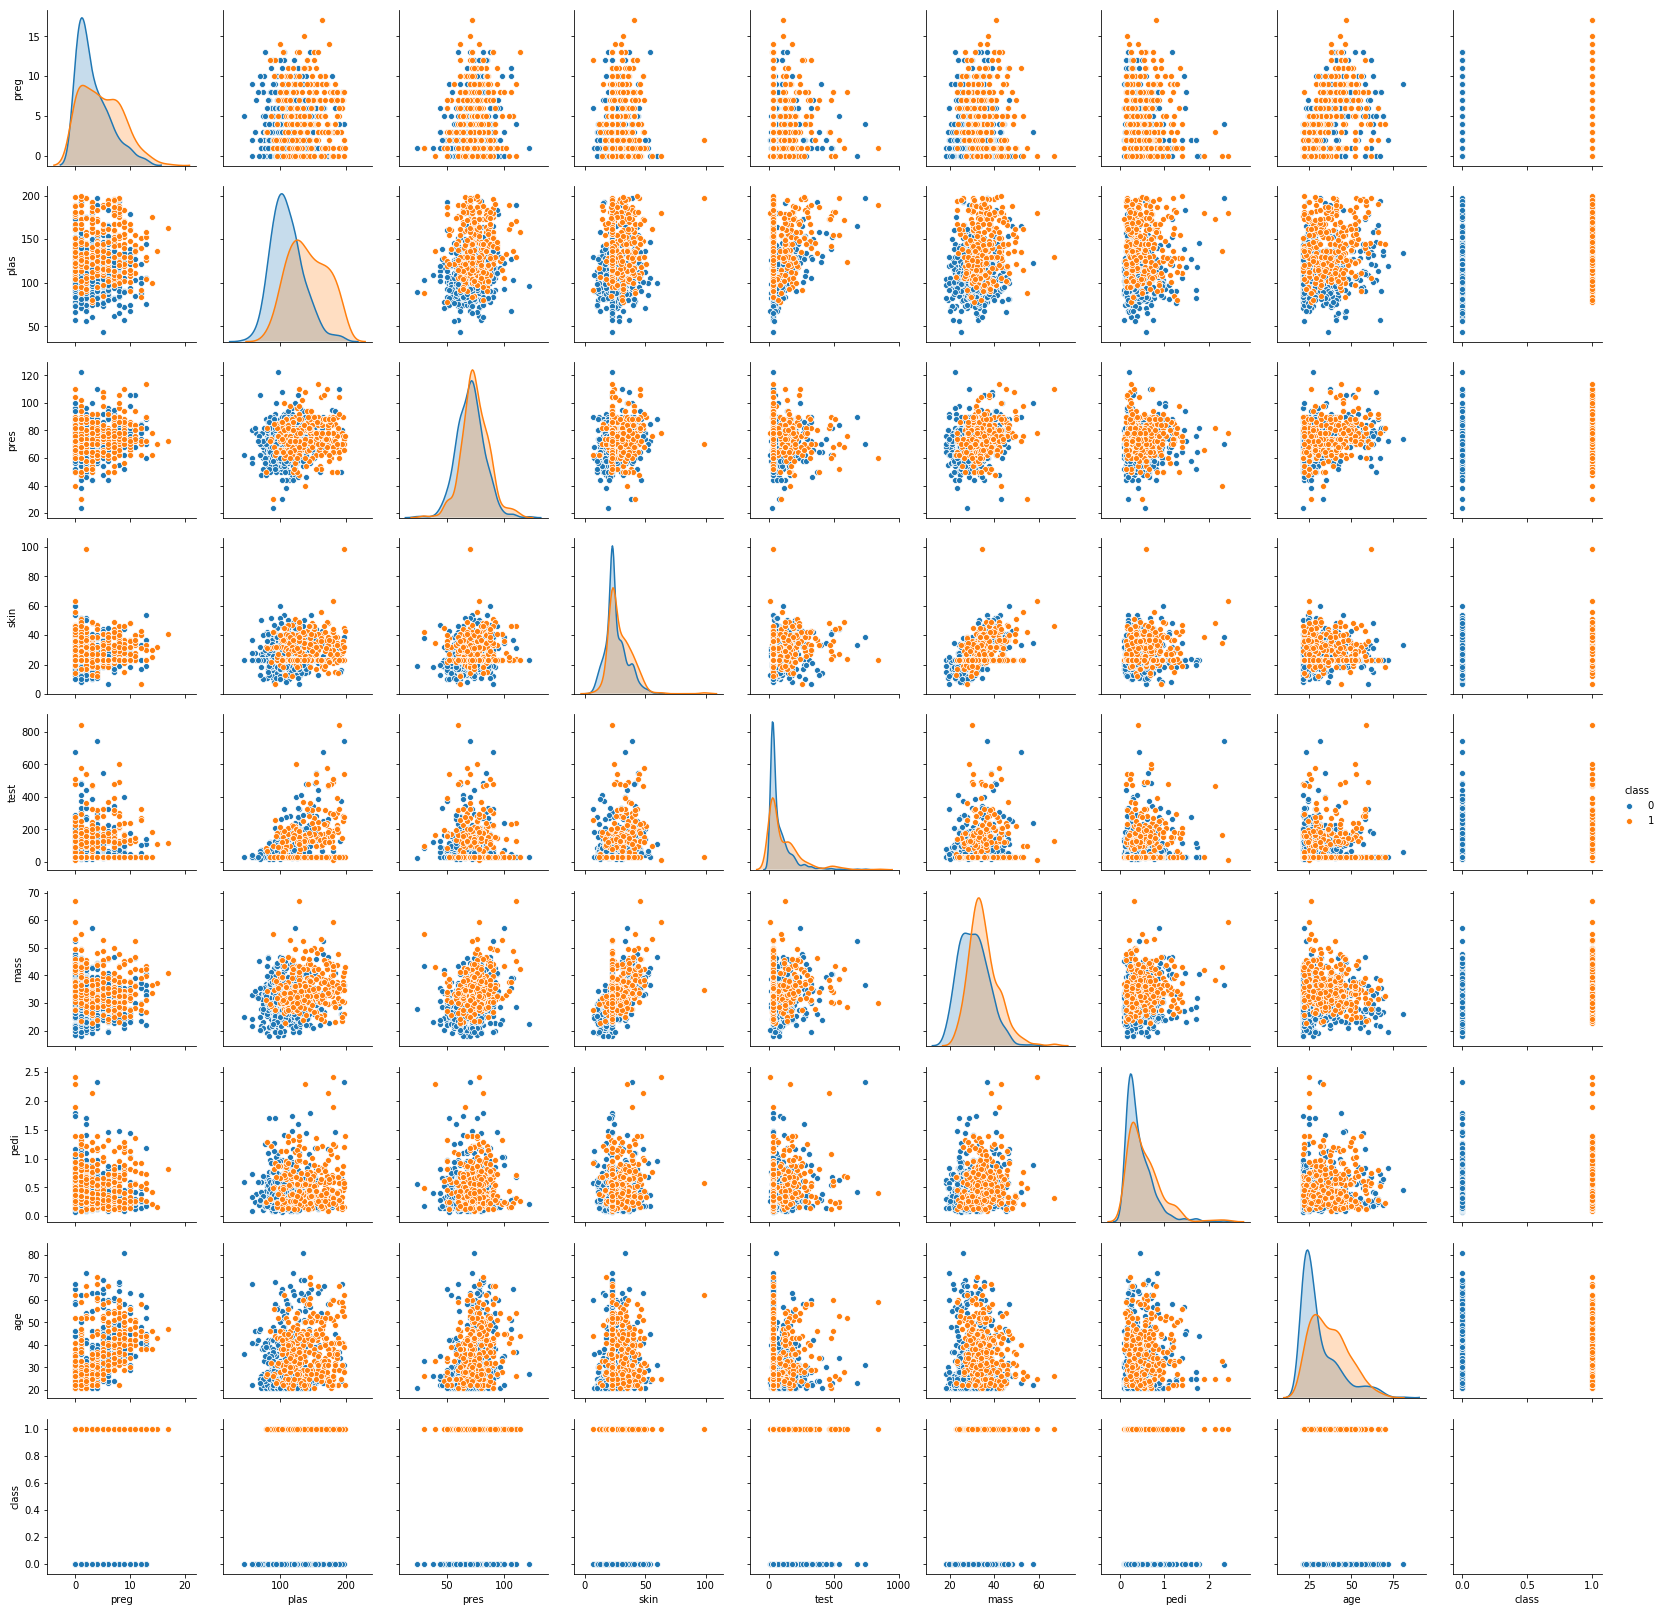

In [68]:
sns.pairplot(pima ,hue='class' )

#from this plot we can nfer that there 

with increase in age --- there is increase in chance of diabeties 

with increase in no of pregnancies --- there is increase in chance of diabeties

higher the plasma (glucose levels )  there is increase in chance of diabeties 

However blood pressure and skin do not contribute much

The insulin test on very higher ranges -- the person is mostly classified with diabeties

with the very higher values of mass --- surprisingly the classification is towards non-diabetic

In [82]:
pima.corr

<bound method DataFrame.corr of      preg  plas  pres  skin   test  mass   pedi  age  class
0       6   148    72    35   30.5  33.6  0.627   50      1
1       1    85    66    29   30.5  26.6  0.351   31      0
2       8   183    64    23   30.5  23.3  0.672   32      1
3       1    89    66    23   94.0  28.1  0.167   21      0
4       0   137    40    35  168.0  43.1  2.288   33      1
..    ...   ...   ...   ...    ...   ...    ...  ...    ...
763    10   101    76    48  180.0  32.9  0.171   63      0
764     2   122    70    27   30.5  36.8  0.340   27      0
765     5   121    72    23  112.0  26.2  0.245   30      0
766     1   126    60    23   30.5  30.1  0.349   47      1
767     1    93    70    31   30.5  30.4  0.315   23      0

[768 rows x 9 columns]>

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [71]:
X=pima.drop('class',axis=1)
y=pima['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [79]:
dTree = DecisionTreeClassifier(max_depth=3,criterion='entropy')
dTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [80]:
print("What is the Testing Accuracy")
print(dTree.score(X_test,y_test))
print("What is the Training Accuracy")
print(dTree.score(X_train,y_train))
predicted = dTree.predict(X_test)
print(confusion_matrix(y_test,predicted))

What is the Testing Accuracy
0.7662337662337663
What is the Training Accuracy
0.7635009310986964
[[123  23]
 [ 31  54]]


Print the feature importance of the decision model - Optional

In [81]:
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import precision_score
print(precision_score(y_test,predicted))
print(recall_score(y_test,predicted))
print(f1_score(y_test,predicted))

0.7012987012987013
0.6352941176470588
0.6666666666666666
